In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import linregress
import math

import locale
locale.setlocale( locale.LC_ALL, "en_US.UTF-8")

'en_US.UTF-8'

In [4]:
#Import cleanup data
movies = pd.read_csv("../Resources/US_movies_cleanup.csv", encoding ="ISO-8859-1")
movies.drop(columns = ["Unnamed: 0"], inplace=True)

### Drop all NaN based on Box Office
movies.dropna(subset=["Box Office"], how='all', inplace = True)
# movies.head()

In [5]:
### Get Box Office and three ratings to list
BoxOffice = movies["Box Office"].tolist() 
BoxOffice_num = [locale.atof(BoxOffice[l].strip("$")) for l in range(len(BoxOffice))]
BoxOffice_million = [l/1e6 for l in BoxOffice_num] #Convert to million

IMDb_rating= movies["IMDb Rating"].tolist()

RT_rating = movies["Rotten Tomatoes Rating"].str.rstrip('%').astype('float')
RT_rating = RT_rating.tolist()

Metascore = movies["Metascore"].tolist()

In [6]:
# Get rid of nan values based on IMDb
IMDb_BoxOffice = pd.DataFrame({"IMDb": IMDb_rating, "BoxOffice": BoxOffice_million}) 
IMDb_BoxOffice.dropna(subset=["IMDb"], how='all', inplace = True)
IMDb_rating_nonull = IMDb_BoxOffice["IMDb"].tolist()
BoxOffice_IMDb_nonull= IMDb_BoxOffice["BoxOffice"].tolist()
Linear_IMDb = stats.linregress(IMDb_rating_nonull, BoxOffice_IMDb_nonull)

In [9]:
# Get rid of nan values based on Rotten Tomato
RT_BoxOffice = pd.DataFrame({"RT": RT_rating, "BoxOffice": BoxOffice_million}) 
RT_BoxOffice.dropna(subset=["RT"], how='all', inplace = True)
RT_rating_nonull = RT_BoxOffice["RT"].tolist()
BoxOffice_RT_nonull= RT_BoxOffice["BoxOffice"].tolist()
Linear_RT = stats.linregress(RT_rating_nonull, BoxOffice_RT_nonull)

In [10]:
# Get rid of nan values based on Metascore
Metascore_BoxOffice = pd.DataFrame({"Metascore": Metascore, "BoxOffice": BoxOffice_million}) 
Metascore_BoxOffice.dropna(subset=["Metascore"], how='all', inplace = True)
Metascore_rating_nonull = Metascore_BoxOffice["Metascore"].tolist()
BoxOffice_Metascore_nonull= Metascore_BoxOffice["BoxOffice"].tolist()
Linear_Metascore = stats.linregress(Metascore_rating_nonull, BoxOffice_Metascore_nonull)


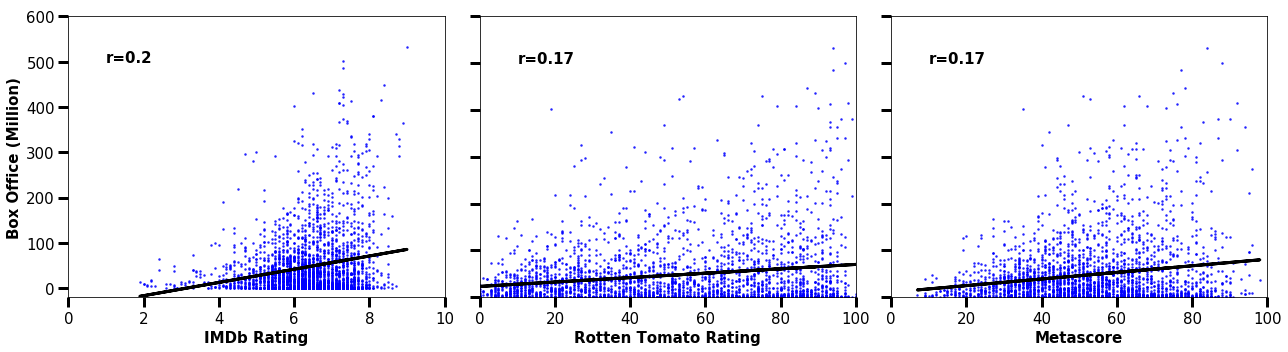

In [11]:
### Start plotting 
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,5))
ax1.scatter(IMDb_rating_nonull, BoxOffice_IMDb_nonull, s=2.5, marker="o", facecolors="b", alpha=0.7)
ax1.plot(IMDb_rating_nonull, Linear_IMDb[0]*np.asanyarray(IMDb_rating_nonull)+Linear_IMDb[1],'k-', lw=3)
ax1.set_ylabel("Box Office (Million)", fontsize=15, weight="bold")
ax1.set_ylim([-20, 600])
ax1.yaxis.set_tick_params(width=3, size=10)
ax1.set_xticklabels(np.arange(0,12,2))
ax1.set_xlim([0, 10])
ax1.xaxis.set_tick_params(width=3, size=10)
ax1.tick_params(labelsize=15)
ax1.set_xlabel("IMDb Rating", fontsize =15, weight="bold") 
ax1.text(1, 500, "r="+str(np.round(Linear_IMDb[2]*100)/100), fontsize =15, weight="bold")

ax2.scatter(RT_rating_nonull, BoxOffice_RT_nonull, s=2.5, marker="o", facecolors="b", alpha=0.7)
ax2.plot(RT_rating_nonull, Linear_RT[0]*np.asanyarray(RT_rating_nonull)+Linear_RT[1],'k-', lw=3)
ax2.set_yticklabels( () )
ax2.set_ylim([0, 600])
ax2.yaxis.set_tick_params(width=3, size=10)
ax2.set_xticklabels(np.arange(0,120,20))
ax2.set_xlim([0, 100])
ax2.xaxis.set_tick_params(width=3, size=10)
ax2.tick_params(labelsize=15)
ax2.set_xlabel("Rotten Tomato Rating", fontsize =15, weight="bold") 
ax2.text(10, 500, "r="+str(np.round(Linear_RT[2]*100)/100), fontsize =15, weight="bold")


ax3.scatter(Metascore_rating_nonull, BoxOffice_Metascore_nonull, s=2.5, marker="o", facecolors="b", alpha=0.7)
ax3.plot(Metascore_rating_nonull, Linear_Metascore[0]*np.asanyarray(Metascore_rating_nonull)+Linear_Metascore[1],'k-', lw=3)
ax3.set_yticklabels( () )
ax3.set_ylim([0, 600])
ax3.yaxis.set_tick_params(width=3, size=10)
ax3.set_xticklabels(np.arange(0,120,20))
ax3.set_xlim([0, 100])
ax3.xaxis.set_tick_params(width=3, size=10)
ax3.tick_params(labelsize=15)
ax3.set_xlabel("Metascore", fontsize =15, weight="bold") 
ax3.text(10, 500, "r="+str(np.round(Linear_Metascore[2]*100)/100), fontsize =15, weight="bold")

plt.tight_layout()
# plt.savefig("../Figures/LinearRegression.png")

plt.show()


In [12]:
print(Linear_IMDb[2])
print(Linear_RT[2])
print(Linear_Metascore[2])

0.1991367127709505
0.17393638224088423
0.16642918073567078


In [13]:
Linear_IMDb

LinregressResult(slope=14.599130014978803, intercept=-45.64034542370686, rvalue=0.1991367127709505, pvalue=4.146155605276537e-27, stderr=1.3401265245030107)